In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'1.4.0'

### Make random points:

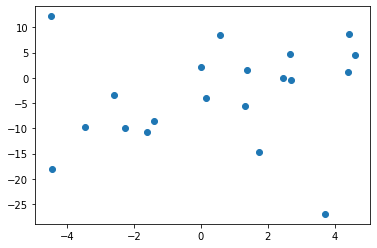

In [2]:
N = 20

X = np.random.random(N)*10 - 5
Y = 0.5 * X - 1 + np.random.randn(N) *10 - 5

plt.scatter(X, Y);

### Create the linear regression model:

In [3]:
model = nn.Linear(1, 1)
model

Linear(in_features=1, out_features=1, bias=True)

### Define loss and optimizer

In [4]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
criterion, optimizer

(MSELoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     lr: 0.1
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### Reshape data and create tensors:

In [5]:
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

X.shape, Y.shape

((20, 1), (20, 1))

In [6]:
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))
type(inputs), type(targets)

(torch.Tensor, torch.Tensor)

### Train model:

In [7]:
epochs = 31
losses = []

for epoch in range(1, epochs):
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(inputs, outputs)
    
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch}/{epochs} Loss: {loss}")

Epoch 1/31 Loss: 6.1446638107299805
Epoch 2/31 Loss: 3.0809473991394043
Epoch 3/31 Loss: 1.5477700233459473
Epoch 4/31 Loss: 0.7794731855392456
Epoch 5/31 Loss: 0.39379096031188965
Epoch 6/31 Loss: 0.19974146783351898
Epoch 7/31 Loss: 0.10182596743106842
Epoch 8/31 Loss: 0.052236407995224
Epoch 9/31 Loss: 0.027004782110452652
Epoch 10/31 Loss: 0.014091799035668373
Epoch 11/31 Loss: 0.007435639388859272
Epoch 12/31 Loss: 0.003974508959800005
Epoch 13/31 Loss: 0.0021557798609137535
Epoch 14/31 Loss: 0.0011882761027663946
Epoch 15/31 Loss: 0.0006663271924480796
Epoch 16/31 Loss: 0.0003803036524914205
Epoch 17/31 Loss: 0.0002209069934906438
Epoch 18/31 Loss: 0.0001305060723097995
Epoch 19/31 Loss: 7.83170253271237e-05
Epoch 20/31 Loss: 4.766861457028426e-05
Epoch 21/31 Loss: 2.937439967354294e-05
Epoch 22/31 Loss: 1.829368011385668e-05
Epoch 23/31 Loss: 1.1493581041577272e-05
Epoch 24/31 Loss: 7.273954452102771e-06
Epoch 25/31 Loss: 4.630188868759433e-06
Epoch 26/31 Loss: 2.961361587949795

### Losses per epoch:

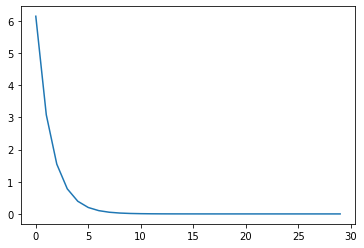

In [8]:
plt.plot(losses);

### Predictions:

In [9]:
predicted = model(inputs)
predicted

tensor([[-1.6137],
        [ 1.7423],
        [ 2.4408],
        [ 0.1503],
        [ 4.4101],
        [-3.4581],
        [ 4.6066],
        [ 2.6662],
        [ 1.3283],
        [-4.4986],
        [ 3.7096],
        [-2.2813],
        [-1.4013],
        [ 1.3647],
        [-4.4454],
        [ 4.4255],
        [ 2.7013],
        [-2.6068],
        [ 0.5828],
        [ 0.0144]], grad_fn=<AddmmBackward>)

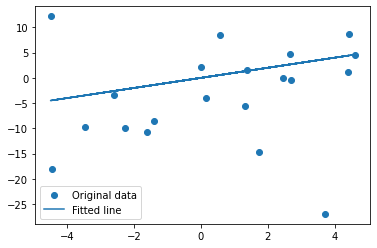

In [10]:
predicted = predicted.detach().numpy()
plt.scatter(X, Y, label="Original data")
plt.plot(X, predicted, label="Fitted line")
plt.legend();

### Another way:`

In [21]:
with torch.no_grad():
    out = model(inputs)
out

tensor([[-1.6137],
        [ 1.7423],
        [ 2.4408],
        [ 0.1503],
        [ 4.4101],
        [-3.4581],
        [ 4.6066],
        [ 2.6662],
        [ 1.3283],
        [-4.4986],
        [ 3.7096],
        [-2.2813],
        [-1.4013],
        [ 1.3647],
        [-4.4454],
        [ 4.4255],
        [ 2.7013],
        [-2.6068],
        [ 0.5828],
        [ 0.0144]])

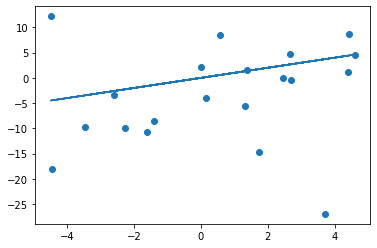

In [22]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
y = (X * w) + b
plt.scatter(X, Y)
plt.plot(X, y);

In [23]:
y.astype(np.int32) == predicted.astype(np.int32)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])